In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mord import LogisticAT
from collections import OrderedDict
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

In [41]:
df = pd.read_json('data.json')

In [42]:
df

,normalized_sclera_area,width_over_height,label
0,0.337145,2.049031,wide
1,0.242546,2.705165,wide
2,0.303419,2.214134,wide
3,0.306884,2.145044,wide
4,0.283548,2.275349,wide
...,...,...,...
8769,0.004560,20.000000,closed
8770,0.004815,5.608587,closed
8771,0.011204,4.744976,closed
8772,0.059252,9.084570,closed


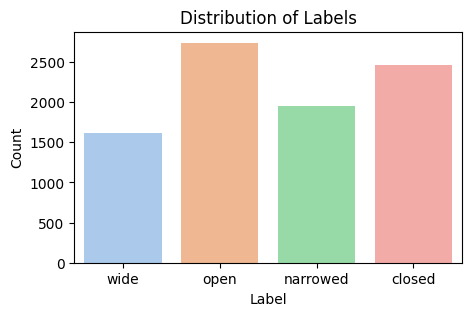

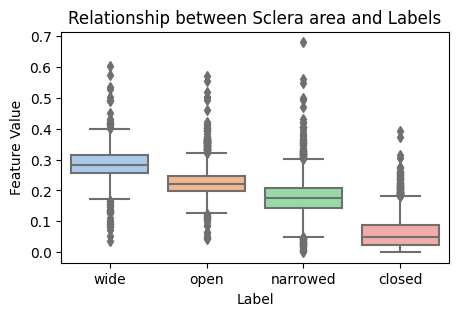

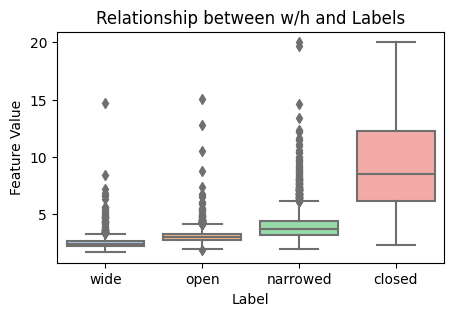

In [43]:
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='label', palette='pastel')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(5, 3))
sns.boxplot(data=df, x='label', y='normalized_sclera_area', palette='pastel')
plt.title('Relationship between Sclera area and Labels')
plt.xlabel('Label')
plt.ylabel('Feature Value')
plt.show()

plt.figure(figsize=(5, 3))
sns.boxplot(data=df, x='label', y='width_over_height', palette='pastel')
plt.title('Relationship between w/h and Labels')
plt.xlabel('Label')
plt.ylabel('Feature Value')
plt.show()

In [44]:
ordinal_mapping = OrderedDict({
    "wide": 0,
    "open": 1,
    "narrowed": 2,
    "closed": 3
})

In [45]:
X = df[['normalized_sclera_area', 'width_over_height']].values
y = df['label'].map(ordinal_mapping).values

In [46]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [47]:
classifier = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticAT())
])

classifier.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()), ('classifier', LogisticAT())])

In [48]:
y_train_pred = cross_val_predict(classifier, X, y, cv=100)
y_train_pred

array([0, 1, 0, ..., 3, 3, 3])

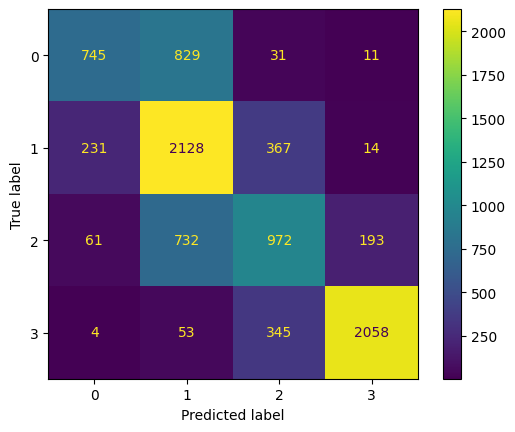

In [49]:
mat = confusion_matrix(y, y_train_pred)
ConfusionMatrixDisplay(mat, display_labels=classifier.classes_).plot()

In [50]:
precision = precision_score(y, y_train_pred, average='weighted')
recall = recall_score(y, y_train_pred, average='weighted')
f1_score = 2 * (precision * recall) / (precision + recall)

print(precision)
print(recall)
print(f1_score)

0.6893988905496128
0.6727832231593344
0.6809897193020106


In [51]:
probabilities = classifier.predict_proba(X)
probabilities

array([[7.68319787e-01, 2.10792267e-01, 1.96580806e-02, 1.22986601e-03],
       [2.72335257e-01, 5.68682366e-01, 1.48188939e-01, 1.07934374e-02],
       [6.17221999e-01, 3.40746655e-01, 3.95052349e-02, 2.52611103e-03],
       ...,
       [1.25818091e-03, 1.62365916e-02, 2.18266958e-01, 7.64238269e-01],
       [8.10201704e-05, 1.06295029e-03, 1.83118777e-02, 9.80544152e-01],
       [1.16180442e-03, 1.50130133e-02, 2.05514811e-01, 7.78310371e-01]])

In [52]:
import pickle

pickle.dump(classifier, open('eyecloseness_model.pkl','wb'))